In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import unquote

In [2]:
df = pd.read_csv('lotr_network.csv',index_col='Unnamed: 0', encoding='latin-1')
df.head(20)

,source,target,weight
0,Beorn,Gandalf,1
1,Beorn,Bilbo_Baggins,1
2,Beorn,Azog,1
3,Beorn,Sauron,1
4,Beorn,Gollum,1
5,Melkor,Eru_Il%C3%BAvatar,2
6,Melkor,Manw%C3%AB,4
7,Melkor,Tulkas,2
8,Melkor,Sauron,4
9,Melkor,Orom%C3%AB,2


In [3]:
data = df[['source', 'target']].applymap(lambda x: unquote(x))

In [4]:
data['weight']=df['weight']

In [5]:
data.tail(20)

,source,target,weight
10744,Sauron,Oromë,1
10745,Sauron,Mandos,1
10746,Sauron,Tulkas,1
10747,Sauron,Varda,1
10748,Sauron,Yavanna,1
10749,Sauron,Nienna,1
10750,Sauron,Estë,1
10751,Sauron,Vairë,1
10752,Sauron,Vána,1
10753,Sauron,Nessa,1


In [6]:
data[['source','target']] = data[['source','target']].applymap(lambda x : x.replace('_', ' '))\
.applymap(lambda x : x.split(' (')[0])

In [7]:
G = nx.Graph()

In [8]:
for i in data.iterrows():
    G.add_edge(i[1]['source'], i[1]['target'], weight=i[1]['weight'])

In [9]:
# for i in data.iterrows():
# #     print(i[1]['edge'].split(',')[0][2:-1],i[1]['edge'].split(',')[1][2:-2], i[1]['weight'])
#     G.add_edge(i[1]['edge'].split(',')[0][2:-1],i[1]['edge'].split(',')[1][2:-2], weight=i[1]['weight'])

In [10]:
pos_k = nx.kamada_kawai_layout(G, weight='weight', scale = 5)

(-4.593906446577699, 5.456852687932272, -5.343593182173441, 5.300092133362497)

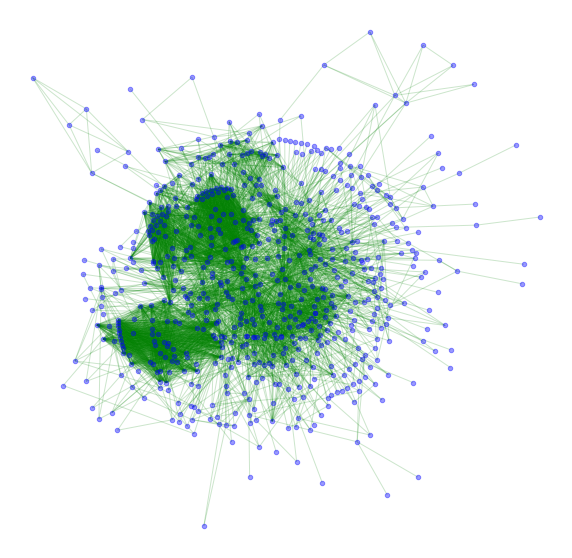

In [11]:
fig, ax = plt.subplots(figsize=(10, 10));

nx.draw_networkx_nodes(G, pos=pos_k, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, pos=pos_k, edge_color="green", alpha=0.2)

plt.axis('off')
#plt.savefig(fname='one_graph_to_rule_them_all.pdf', dpi=None)

In [12]:
G.edges(data=True)

EdgeDataView([('Beorn', 'Gandalf', {'weight': 1}), ('Beorn', 'Bilbo Baggins', {'weight': 2}), ('Beorn', 'Azog', {'weight': 1}), ('Beorn', 'Sauron', {'weight': 1}), ('Beorn', 'Gollum', {'weight': 1}), ('Beorn', 'Thranduil', {'weight': 1}), ('Beorn', 'Radagast', {'weight': 2}), ('Beorn', 'Balin', {'weight': 1}), ('Beorn', 'Bolg', {'weight': 1}), ('Beorn', 'Fimbul', {'weight': 1}), ('Beorn', 'Narzug', {'weight': 1}), ('Gandalf', 'Melkor', {'weight': 1}), ('Gandalf', 'Aulë', {'weight': 1}), ('Gandalf', 'Frodo Baggins', {'weight': 3}), ('Gandalf', 'Bilbo Baggins', {'weight': 2}), ('Gandalf', 'Alatar', {'weight': 1}), ('Gandalf', 'Ancalagon', {'weight': 1}), ('Gandalf', 'Aragorn II Elessar', {'weight': 2}), ('Gandalf', 'Saruman', {'weight': 7}), ('Gandalf', 'Elrond', {'weight': 4}), ('Gandalf', 'Galadriel', {'weight': 4}), ('Gandalf', 'Éowyn', {'weight': 1}), ('Gandalf', 'Théoden', {'weight': 1}), ('Gandalf', 'Meriadoc Brandybuck', {'weight': 4}), ('Gandalf', 'Legolas', {'weight': 4}), ('Gan

In [13]:
{k: v for k,v in sorted(G.degree(), key=lambda x: x[1], reverse=True)}

{'Sauron': 144,
 'Aragorn II Elessar': 123,
 'Isildur': 110,
 'Elros': 104,
 'Saruman': 103,
 'Elrond': 95,
 'Eldarion': 91,
 'Cemendur': 85,
 'Gandalf': 80,
 'Ondoher': 79,
 'Arvedui': 77,
 'Fíriel': 76,
 'Beren': 75,
 'Faramir': 74,
 'J.R.R. Tolkien': 73,
 'Eärendil': 72,
 'Galadriel': 68,
 'Melkor': 65,
 'Lúthien': 61,
 'Túrin': 59,
 'Tar-Aldarion': 59,
 'Ar-Pharazôn': 58,
 'Finwë': 57,
 'Turgon': 57,
 'Tuor': 55,
 'Melian': 55,
 'Éowyn': 55,
 'Tar-Minastir': 55,
 'Tar-Ancalimë': 55,
 'Tar-Palantir': 55,
 'Théoden': 54,
 'Valandil of Andúnië': 54,
 'Tar-Meneldur': 54,
 'Erendis': 54,
 'Celeborn': 53,
 'Arathorn II': 53,
 'Tar-Elendil': 53,
 'Tar-Ardamin': 53,
 'Uruk-hai': 52,
 'Elwing': 52,
 'Argonui': 52,
 'Isilmo': 52,
 'Gimilkhâd': 52,
 'Manwendil': 52,
 'Tar-Amandil': 52,
 'Vardilmë': 52,
 'Lindissë': 52,
 'Ailinel': 52,
 'Hallacar': 52,
 'Tar-Telperiën': 52,
 'Tar-Ciryatan': 52,
 'Tar-Alcarin': 52,
 'Tar-Calmacil': 52,
 'Ar-Adûnakhôr': 52,
 'Eärendur': 52,
 'Aranarth': 51,
 'Rí

In [14]:
{k: v for k,v in sorted(nx.clustering(G).items(), key=lambda x: x[1], reverse=True)}

{'Meneldor': 1.0,
 'Roäc': 1.0,
 'Hilary Tolkien': 1.0,
 'Robert Quilter Gilson': 1.0,
 'Geoffrey Bache Smith': 1.0,
 'Gostir': 1.0,
 'Lurtz': 1.0,
 'Morwen Steelsheen': 1.0,
 'Malva "Headstrong" Brandybuck': 1.0,
 'Ohtar': 1.0,
 'Evonyn': 1.0,
 'Damrod': 1.0,
 'Beechbone': 1.0,
 'Bregalad': 1.0,
 'Ivorwen': 1.0,
 'Ingwion': 1.0,
 'Calimmacil': 1.0,
 'Frór': 1.0,
 'Ibûn': 1.0,
 'Bell': 1.0,
 'Orgulas Brandybuck': 1.0,
 'Berilac Brandybuck': 1.0,
 'Doderic Brandybuck': 1.0,
 'Ilberic Brandybuck': 1.0,
 'Gorgol': 1.0,
 'Fram': 1.0,
 'Frumgar': 1.0,
 'Léod': 1.0,
 'Thuringwethil': 1.0,
 'Nahar': 1.0,
 'Nielíqui': 1.0,
 'Orleg': 1.0,
 'Ulrad': 1.0,
 'Beril': 1.0,
 'Hirwen': 1.0,
 'Gilwen': 1.0,
 'Zamîn': 1.0,
 'Núneth': 1.0,
 'Eilinel': 1.0,
 'Elemmakil': 1.0,
 'Hildigard Took': 1.0,
 'Oikeroi': 1.0,
 'Umuiyan': 1.0,
 'Haldar': 1.0,
 'Fuinur': 1.0,
 'Indor': 1.0,
 'Bladorthin': 1.0,
 'Saelon': 1.0,
 'Silindë': 1.0,
 'Caladhir': 1.0,
 'Nilfaleth': 1.0,
 'Ragnir': 1.0,
 'Hláfwine': 1.0,
 'Hu

In [15]:
nx.average_clustering(G)

0.6233598111405717

In [16]:
sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)

[('Sauron', 0.01374564199133631),
 ('Saruman', 0.01258440214036412),
 ('Gandalf', 0.0090765507344717),
 ('J.R.R. Tolkien', 0.008199458889026175),
 ('Elrond', 0.00804332786610559),
 ('Aragorn II Elessar', 0.007066401393384413),
 ('Beren', 0.007002681384191342),
 ('Galadriel', 0.006266386377681603),
 ('Uruk-hai', 0.0061494669074544745),
 ('Faramir', 0.005970908402895549),
 ('Bilbo Baggins', 0.005927224014180854),
 ('Isildur', 0.0058657076797677885),
 ('Elros', 0.005838862182904144),
 ('Frodo Baggins', 0.005792524802484418),
 ('Melkor', 0.00546034623938592),
 ('Túrin', 0.005428191351691051),
 ('Eärendil', 0.005262000735124804),
 ('Legolas', 0.005008958122925776),
 ('Théoden', 0.004943390254293103),
 ('Gimli', 0.004936261765229038),
 ('Turgon', 0.004888292172562938),
 ('Tuor', 0.004820637851875464),
 ('Lúthien', 0.004818349364952948),
 ('Celeborn', 0.004540834990834761),
 ('Meriadoc Brandybuck', 0.004504341593494838),
 ('Húrin', 0.004365880001391358),
 ('Finwë', 0.0043599885386979105),
 ('

In [17]:
sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('Sauron', 0.2155688622754491),
 ('Aragorn II Elessar', 0.18413173652694612),
 ('Isildur', 0.16467065868263475),
 ('Elros', 0.15568862275449102),
 ('Saruman', 0.1541916167664671),
 ('Elrond', 0.14221556886227546),
 ('Eldarion', 0.13622754491017966),
 ('Cemendur', 0.12724550898203593),
 ('Gandalf', 0.11976047904191617),
 ('Ondoher', 0.11826347305389222),
 ('Arvedui', 0.11526946107784432),
 ('Fíriel', 0.11377245508982037),
 ('Beren', 0.11227544910179642),
 ('Faramir', 0.11077844311377247),
 ('J.R.R. Tolkien', 0.1092814371257485),
 ('Eärendil', 0.10778443113772455),
 ('Galadriel', 0.10179640718562875),
 ('Melkor', 0.09730538922155689),
 ('Lúthien', 0.09131736526946109),
 ('Túrin', 0.08832335329341318),
 ('Tar-Aldarion', 0.08832335329341318),
 ('Ar-Pharazôn', 0.08682634730538923),
 ('Finwë', 0.08532934131736528),
 ('Turgon', 0.08532934131736528),
 ('Tuor', 0.08233532934131738),
 ('Melian', 0.08233532934131738),
 ('Éowyn', 0.08233532934131738),
 ('Tar-Minastir', 0.08233532934131738),
 ('Ta

In [18]:
sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('Sauron', 0.1439701525524223),
 ('Aragorn II Elessar', 0.08882160161113022),
 ('J.R.R. Tolkien', 0.07873985193243478),
 ('Saruman', 0.07567282015332846),
 ('Elros', 0.06959179695019156),
 ('Elrond', 0.05827053447338174),
 ('Gandalf', 0.05245385179351513),
 ('Isildur', 0.0505301313139201),
 ('Bilbo Baggins', 0.04859026026564219),
 ('Túrin', 0.0408603203586675),
 ('Faramir', 0.04001557762168929),
 ('Beren', 0.03542141611531915),
 ('Frodo Baggins', 0.0331119950752744),
 ('Eärendil', 0.028720983138805094),
 ('Galadriel', 0.02534802304762466),
 ('Húrin', 0.024322972515029455),
 ('Uruk-hai', 0.023407806371014542),
 ('Tuor', 0.02166334325714059),
 ('Théoden', 0.020113688472406202),
 ('Meriadoc Brandybuck', 0.01916079919925001),
 ('Thingol', 0.018937190331446765),
 ('Cemendur', 0.017685300608804994),
 ('Melkor', 0.016639987208739382),
 ('Lúthien', 0.01659671399648083),
 ('Turgon', 0.016411037132892593),
 ('Eldarion', 0.01640799865447411),
 ('Melian', 0.014338881446265338),
 ('Tar-Aldarion', 

In [19]:
sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('Sauron', 0.4949022143506414),
 ('Elrond', 0.4839212164805813),
 ('Aragorn II Elessar', 0.4824447215408999),
 ('Eärendil', 0.46472081553278455),
 ('Isildur', 0.45832248546385485),
 ('Saruman', 0.450809002095595),
 ('Beren', 0.45048791306276337),
 ('Galadriel', 0.44825303326727123),
 ('Gandalf', 0.44793557361198283),
 ('Elros', 0.4416794901816478),
 ('J.R.R. Tolkien', 0.43740320189496523),
 ('Melian', 0.43529596004137633),
 ('Lúthien', 0.4323205946275596),
 ('Frodo Baggins', 0.4320252936749452),
 ('Faramir', 0.42851289291336025),
 ('Witch-king of Angmar', 0.42764369840440825),
 ('Elladan and Elrohir', 0.42764369840440825),
 ('Idril', 0.4270661917218905),
 ('Melkor', 0.4239175803888202),
 ('Celeborn', 0.4239175803888202),
 ('Gollum', 0.42250169000676),
 ('Elwing', 0.41914183561306806),
 ('Legolas', 0.4183102049868517),
 ('Turgon', 0.4174818679472737),
 ('Glorfindel', 0.4150164238452229),
 ('Denethor II', 0.414201067413307),
 ('Peregrin Took', 0.4123109712777834),
 ('Gimli', 0.410971429

In [20]:

df_eigenvector_centrality = pd.DataFrame(sorted(nx.eigenvector_centrality(G, max_iter=200).items(), key=lambda x: x[1], reverse=True), columns=['node','score'])

In [21]:
df_degree_centrality = pd.DataFrame(sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True), columns=['node','score'])
df_closeness_centrality = pd.DataFrame(sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True), columns=['node','score'])
df_betweenness_centrality = pd.DataFrame(sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True), columns=['node','score'])

In [22]:


df_centrality = pd.concat([df_betweenness_centrality, df_closeness_centrality['score'], df_degree_centrality['score'], df_eigenvector_centrality['score']], axis=1)
df_centrality.columns=['node', 'betweenness_centrality', 'closeness_centrality', 'degree_centrality', 'eigenvector_centrality']



In [23]:
df_centrality.head(20)

,node,betweenness_centrality,closeness_centrality,degree_centrality,eigenvector_centrality
0,Sauron,0.143970,0.494902,0.215569,0.145010
1,Aragorn II Elessar,0.088822,0.483921,0.184132,0.137625
2,J.R.R. Tolkien,0.078740,0.482445,0.164671,0.136411
3,Saruman,0.075673,0.464721,0.155689,0.136355
4,Elros,0.069592,0.458322,0.154192,0.135808
5,Elrond,0.058271,0.450809,0.142216,0.135636
6,Gandalf,0.052454,0.450488,0.136228,0.135461
7,Isildur,0.050530,0.448253,0.127246,0.135407
8,Bilbo Baggins,0.048590,0.447936,0.119760,0.135012
9,Túrin,0.040860,0.441679,0.118263,0.134994


In [24]:
from community import community_louvain

In [25]:
partition = community_louvain.best_partition(G, random_state=42, weight='weight')
partition

{'Beorn': 0,
 'Gandalf': 0,
 'Bilbo Baggins': 0,
 'Azog': 0,
 'Sauron': 0,
 'Gollum': 0,
 'Melkor': 1,
 'Eru Ilúvatar': 1,
 'Manwë': 1,
 'Tulkas': 1,
 'Oromë': 1,
 'Fëanor': 2,
 'Ungoliant': 1,
 'Finwë': 2,
 'Maedhros': 2,
 'Fingon': 2,
 'Glaurung': 2,
 'Fingolfin': 2,
 'Thorondor': 2,
 'Lúthien': 2,
 'Beren': 3,
 'Carcharoth': 2,
 'Húrin': 2,
 'Turgon': 2,
 'Maeglin': 2,
 'Tuor': 2,
 'Idril': 2,
 'Eärendil': 2,
 'Ar-Pharazôn': 4,
 'Christopher Tolkien': 2,
 'Sador': 2,
 'Nienna': 1,
 'Arien': 1,
 'Eönwë': 1,
 'Ulmo': 1,
 'Aulë': 1,
 'Mandos': 1,
 'Varda': 1,
 'Yavanna': 1,
 'Estë': 1,
 'Vairë': 1,
 'Vána': 1,
 'Nessa': 1,
 'Ilmarë': 1,
 'Uinen': 1,
 'Salmar': 1,
 'Melian': 1,
 'Saruman': 1,
 'Radagast': 1,
 'Alatar': 1,
 'Pallando': 1,
 'Shelob': 1,
 'Amroth': 0,
 'Nimrodel': 0,
 'Amdír': 0,
 'Legolas': 0,
 'Frodo Baggins': 0,
 'Galadriel': 2,
 'Celeborn': 2,
 'Celebrían': 2,
 'Finarfin': 2,
 'J.R.R. Tolkien': 0,
 'Meriadoc Brandybuck': 0,
 'Peregrin Took': 0,
 'Old Man Willow': 0,
 '

In [26]:
G_ = G.copy()

In [27]:
nx.set_node_attributes(G, partition, name="community")

In [28]:

map_color = dict(enumerate(sorted(set(partition.values()))))
color = [map_color[G.nodes()[i]['community']] for i in G.nodes()]

In [29]:
labels = {}
for node in G.nodes():
    if G.degree(node) >= 10:
        labels[node] = node
        G.nodes()[node]['label']=node

In [30]:
import numpy as np

In [31]:
G.edges(data=True)

EdgeDataView([('Beorn', 'Gandalf', {'weight': 1}), ('Beorn', 'Bilbo Baggins', {'weight': 2}), ('Beorn', 'Azog', {'weight': 1}), ('Beorn', 'Sauron', {'weight': 1}), ('Beorn', 'Gollum', {'weight': 1}), ('Beorn', 'Thranduil', {'weight': 1}), ('Beorn', 'Radagast', {'weight': 2}), ('Beorn', 'Balin', {'weight': 1}), ('Beorn', 'Bolg', {'weight': 1}), ('Beorn', 'Fimbul', {'weight': 1}), ('Beorn', 'Narzug', {'weight': 1}), ('Gandalf', 'Melkor', {'weight': 1}), ('Gandalf', 'Aulë', {'weight': 1}), ('Gandalf', 'Frodo Baggins', {'weight': 3}), ('Gandalf', 'Bilbo Baggins', {'weight': 2}), ('Gandalf', 'Alatar', {'weight': 1}), ('Gandalf', 'Ancalagon', {'weight': 1}), ('Gandalf', 'Aragorn II Elessar', {'weight': 2}), ('Gandalf', 'Saruman', {'weight': 7}), ('Gandalf', 'Elrond', {'weight': 4}), ('Gandalf', 'Galadriel', {'weight': 4}), ('Gandalf', 'Éowyn', {'weight': 1}), ('Gandalf', 'Théoden', {'weight': 1}), ('Gandalf', 'Meriadoc Brandybuck', {'weight': 4}), ('Gandalf', 'Legolas', {'weight': 4}), ('Gan

In [32]:
weights = [np.log(edge[2]["weight"]) for edge in G.edges(data=True)]
weights

[0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0986122886681098,
 0.6931471805599453,
 0.0,
 0.0,
 0.6931471805599453,
 1.9459101490553132,
 1.3862943611198906,
 1.3862943611198906,
 0.0,
 0.0,
 1.3862943611198906,
 1.3862943611198906,
 0.0,
 1.0986122886681098,
 1.3862943611198906,
 0.6931471805599453,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.6931471805599453,
 1.0986122886681098,
 0.0,
 1.0986122886681098,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.0,
 1.3862943611198906,
 0.6931471805599453,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 1.3862943611198906,
 0.0,
 0.0,
 1.0986122886681098,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0

In [33]:
node_size = [d*70 for n, d in G.degree()]

In [34]:
plt.rcParams['figure.figsize'] = 15, 15

In [35]:
nx.write_gexf(G , 'one_graph_to_rule_them_all.gexf')

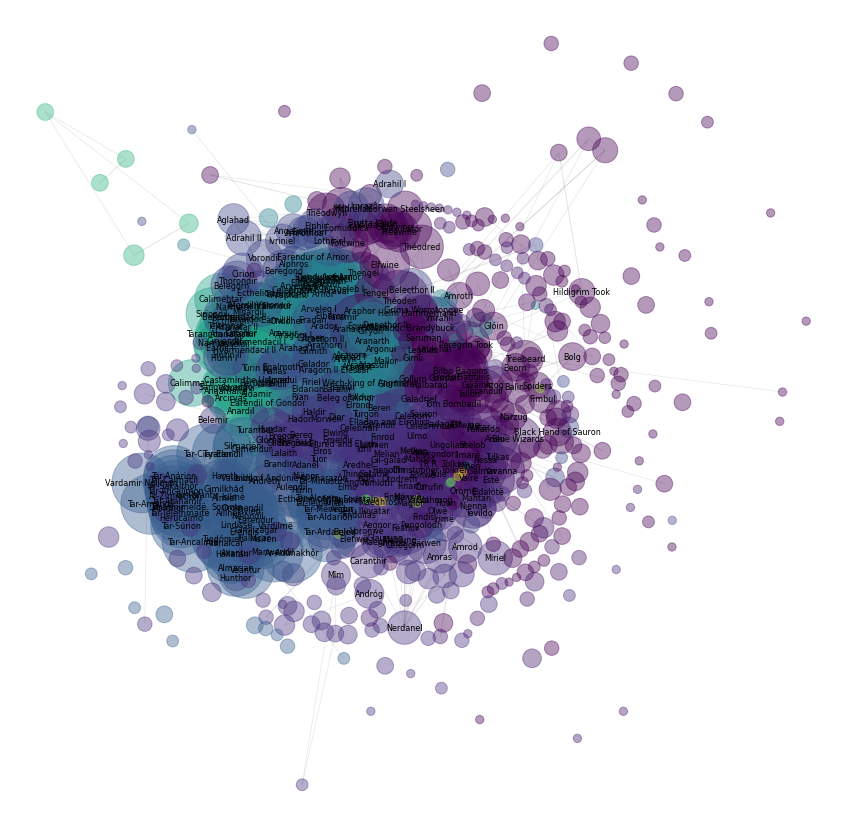

In [38]:
nx.draw_networkx_nodes(G, pos=pos_k, node_size=node_size, node_color=color, alpha=0.4)
nx.draw_networkx_edges(G, pos=pos_k, edge_color="grey", width=weights, alpha=0.2)
nx.draw_networkx_labels(G, pos=pos_k, font_size=8, labels=labels)
plt.axis('off')
plt.savefig(fname='graph.pdf')
#nx.write_gexf(G , 'graph.gexf')
plt.show()